In [1]:
#princess.pyをダウンロードしてから以下を実行してください。
from google.colab import files
uploaded = files.upload()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import chainer.optimizers as Opt
import chainer.functions as F
import chainer.links as L
import chainer.datasets as ds
import chainer.dataset.convert as con
from chainer.iterators import SerialIterator as siter
from chainer import Variable,Chain,config,cuda

import princess as ohm

In [ ]:
ohm.download_fig()

In [2]:
all_list = []
ohm.add_labeled_data("princess_fig",0,all_list)
ohm.add_labeled_data("white_fig",1,all_list)

[('princess_fig/kisaki15.jpg', 0),
 ('princess_fig/kisaki01.jpg', 0),
 ('princess_fig/kisaki14.jpg', 0),
 ('princess_fig/kisaki18.jpg', 0),
 ('princess_fig/kisaki08.jpg', 0),
 ('princess_fig/kisaki00.jpg', 0),
 ('princess_fig/kisaki15b.jpg', 0),
 ('princess_fig/kisaki02.jpg', 0),
 ('princess_fig/kisaki12.jpg', 0),
 ('princess_fig/kisaki13.jpg', 0),
 ('princess_fig/kisaki04.jpg', 0),
 ('princess_fig/kisaki09.jpg', 0),
 ('princess_fig/kisaki10b.jpg', 0),
 ('princess_fig/kisaki07.jpg', 0),
 ('princess_fig/kisaki16.jpg', 0),
 ('princess_fig/kisaki06.jpg', 0),
 ('princess_fig/kisaki03.jpg', 0),
 ('princess_fig/kisaki10.jpg', 0),
 ('princess_fig/kisaki05.jpg', 0),
 ('princess_fig/kisaki17.jpg', 0),
 ('princess_fig/kisaki11.jpg', 0),
 ('white_fig/sira00困ったのコピー.jpg', 1),
 ('white_fig/sira00はてなのコピー.jpg', 1),
 ('white_fig/sira00にっこりのコピー.jpg', 1),
 ('white_fig/sira00あらのコピー.jpg', 1),
 ('white_fig/sira00.jpg', 1),
 ('white_fig/sira00困った.jpg', 1),
 ('white_fig/sira00あら.jpg', 1),
 ('white_fig/sir

In [3]:
dataset = ds.LabeledImageDataset(all_list)

In [4]:
dataset = ds.TransformDataset(dataset, ohm.labeled64)

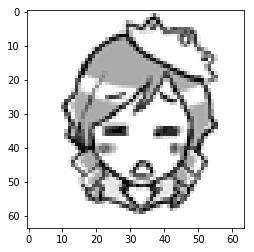

In [5]:
plt.imshow(dataset[0][0].transpose(1,2,0))
plt.show()

In [6]:
D = len(dataset)
Dtrain = D//2
train, test = ds.split_dataset_random(dataset, Dtrain)
xtrain,ttrain = con.concat_examples(train)
xtest,ttest = con.concat_examples(test)

In [7]:
Dtrain,ch,Ny,Nx = xtrain.shape
print(Dtrain,ch,Ny,Nx)

16 3 64 64


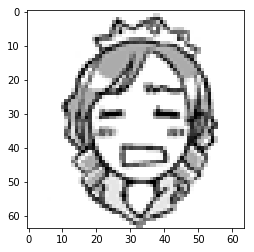

In [8]:
plt.imshow(xtrain[2,:,:,:].transpose(1,2,0))
plt.show()

In [9]:
C = 2
H = 10
layers ={}
layers["l1"] = L.Linear(None,H)
layers["l2"] = L.Linear(H,C)
layers["bnorm1"] = L.BatchNormalization(H)
NN = Chain(**layers)

In [10]:
def model(x):
    h = NN.l1(x)
    h = F.relu(h)
    h = NN.bnorm1(h)
    y = NN.l2(h)
    return y

In [11]:
gpu_device = 0
cuda.get_device(gpu_device).use()
NN.to_gpu(gpu_device)
optNN = Opt.MomentumSGD()
optNN.setup(NN)

In [12]:
train_loss = []
train_acc = []
test_loss = []
test_acc = []
result = [train_loss,test_loss,train_acc,test_acc]

In [13]:
nepoch = 5
batch_size = 10
train_iter = siter(train,batch_size)
while train_iter.epoch < nepoch:
    batch = train_iter.next()
    xtrain,ttrain = con.concat_examples(batch)
    data = cuda.to_gpu([xtrain,xtest,ttrain,ttest])
    ohm.learning_classification(model,optNN,data,result,1)

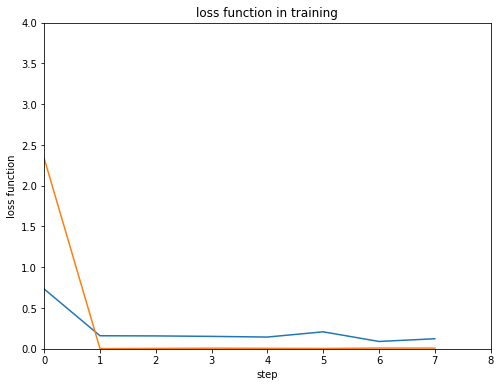

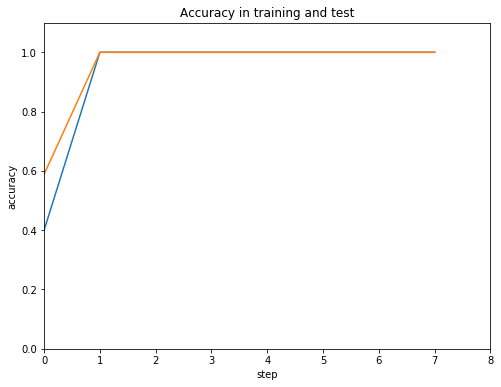

In [14]:
ohm.plot_result2(result[0],result[1],'loss function in training','step','loss function',0.0,4.0)
ohm.plot_result2(result[2],result[3],'Accuracy in training and test','step','accuracy',0.0,1.1)